# Streamlining your code

We will:

- extract data from CSV to create a `geopandas.GeoDataFrame`
- do more customizations for maps and matplotlib figures
- go over strategies to streamline your code!

## Data Loading

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop first column
power_plants = power_plants.drop(columns='Unnamed: 0')

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to `geopandas.GeoDataFrame`

The power plants file is a CSV. Unlike shapefiles, `geopandas` doesn't have a way to extract a geometry column from CSV. So we need to specify this manually.

We will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in NAD83 CRS (EPSG:4259).

In [4]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude,
                   power_plants.latitude)

# Create geodataframe

In [5]:
power_plants = gpd.GeoDataFrame(power_plants,        # Data
                 geometry = points,   # Specify geometry column
                 crs = 'EPSG:4269')   # Specify CRS

<Axes: >

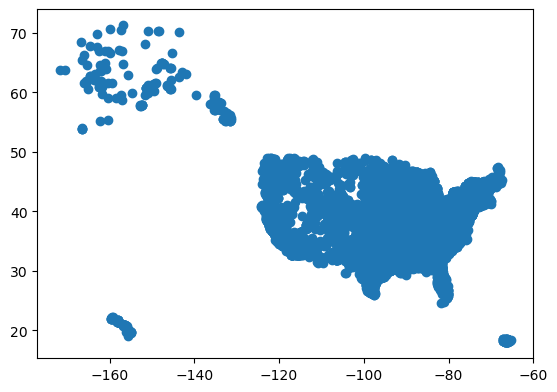

In [6]:
power_plants.plot()

## Start using f-strings

We have printed variables using string concatenation inside `print()` function, writing commas between every string and variable we want to print.

Example:

In [7]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings strings stands for formatted string. The simplest syntax for an f-string is:
```default
f "some text {replace}"
```

`replace` can be a variable, an expression, a function or method call.

In [8]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?' : <25} {power_plants.crs.is_geographic}") # adds spacing
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected}")

Is the CRS geographic?    True
Is the CRS projected?     False


## Explore TIGER shapefile

Preliminary information about the states geodataframe

In [10]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

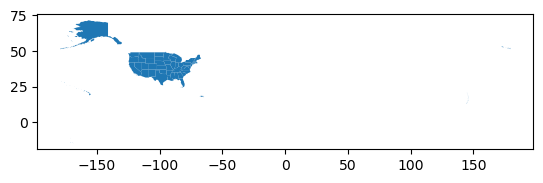

In [11]:
print(states.crs)
states.plot()

## `for` loops

It can be easier to work with codes as numbers instead of strings, so let's update the corresponding columns in the states geodataframe.

In [12]:
# Examine if the region, division, statefp columns are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statesfp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statesfp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name.

Instead, we cna use a for loop to streamline:

In [13]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


**DRY code**

DRY (Don't Repeat Yourself): core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repate the "same" code more than twice, you probably need a for loop.

## `assert`

The `assert` keyword does nothing if the expression next to it evaluates to `True` and it raises an `AssertionError` exception and stops your code from running further if not.

We use it to integrate tests into our code.

Example:

In [14]:
# Does nothing if statement is True
assert 2+2==4

# Raise an error if statement is False
assert 2+2 == 3

AssertionError: 

A workflow for updating the data type of code columns to be integers:

for each column in code_columns:
    convert column to numeric
    check if column is numeric using assert

In [15]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])         # allows us to know that it worked without any output!

In [16]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data selection

For this lesson, we want to use only data for the contiguous states. The data covers a big extension:

<Axes: >

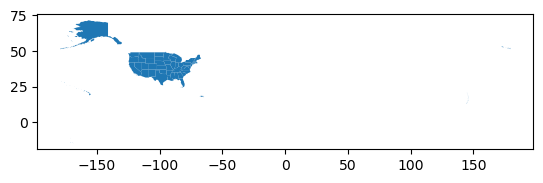

In [17]:
states.plot()

## Check-in

1. What are the unique values for region, division, or state codes in the data?

2. Which codes should we select to only keep states in the contiguous US?

In [19]:
# Finding unique values
print(states['region'].unique())
print(states['division'].unique())
print(states['statefp'].unique())

[3 2 1 4 9]
[5 3 4 1 8 9 2 7 6 0]
[54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


We should select all codes except for 02 (Alaska) and 15 (Hawaii)

In [ ]:
# Division 0 is just the territories
states[states['division'] == 0]

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
34,9,0,78,01802710,78,VI,United States Virgin Islands,00,G4000,A,348021909,1550236187,+18.3392359,-064.9500433,"MULTIPOLYGON (((-64.76834 18.26033, -64.77074 ..."
35,9,0,69,01779809,69,MP,Commonwealth of the Northern Mariana Islands,00,G4000,A,472292521,4644252458,+15.0010865,+145.6181702,"MULTIPOLYGON (((145.05897 14.12500, 145.06302 ..."
36,9,0,66,01802705,66,GU,Guam,00,G4000,A,543555849,934337453,+13.4417451,+144.7719021,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-170.53809 -14.33613, -170.548..."
49,9,0,72,01779808,72,PR,Puerto Rico,00,G4000,A,8869029522,4922249087,+18.2176480,-066.4107992,"MULTIPOLYGON (((-66.32322 17.87767, -66.33170 ..."


In [ ]:
# Select all continuous US states
contiguous = states[(states.region != 9 ) & 
                    (~states.statefp.isin([2, 15]))] # Select EVERYTHING except 2 and 15 (~ negates)

<Axes: >

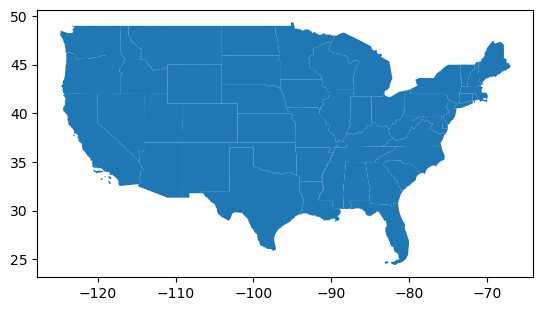

In [30]:
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement.

## Check-in

Select the data in the `power_plants` data frame for the contiguous US states.

In [33]:
power_plants['state'].unique()

array(['Alaska', 'Alabama', 'Texas', 'Minnesota', 'California',
       'Kentucky', 'Nebraska', 'New York', 'Washington', 'Arizona',
       'Kansas', 'South Carolina', 'Florida', 'Nevada', 'Utah',
       'Oklahoma', 'Arkansas', 'Illinois', 'Colorado', 'Wyoming',
       'Connecticut', 'Massachusetts', 'New Mexico', 'Vermont',
       'Delaware', 'Maryland', 'Georgia', 'Missouri', 'Hawaii', 'Idaho',
       'Maine', 'Indiana', 'North Carolina', 'Iowa', 'Louisiana',
       'Michigan', 'Wisconsin', 'Mississippi', 'Montana', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Tennessee', 'Virginia',
       'West Virginia', nan, '994.4', 'District of Columbia',
       'Puerto Rico'], dtype=object)

In [36]:
power_plants = power_plants[~power_plants['state'].isin(["Alaska", "Hawaii", "Puerto Rico"])]

<Axes: >

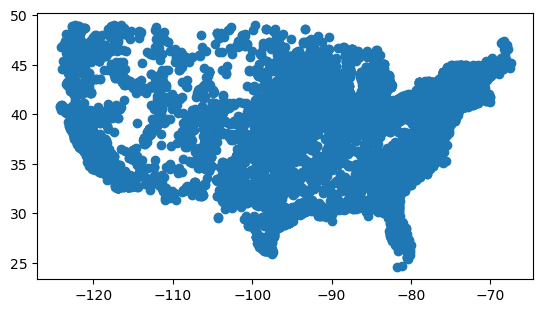

In [38]:
power_plants.plot()

## Plotting

Before plotting data

In [40]:
power_plants.crs == states.crs

True

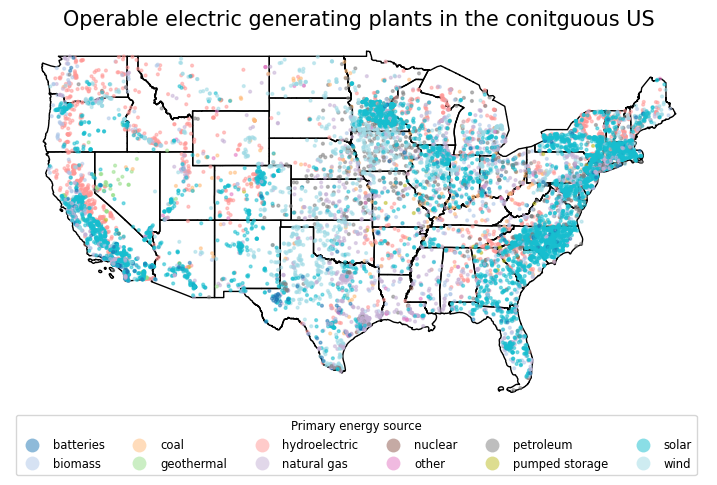

In [59]:
fig, ax = plt.subplots(figsize=(9,5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title
ax.set_title('Operable electric generating plants in the conitguous US',
             fontsize = 15)

# Add states
contiguous.plot(ax=ax,
                color = 'none')

# Add power pltans colored by energy source
power_plants.plot(ax=ax,
                  column = 'primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20', # specifying which color palette I want to use for my points
                  alpha = 0.5,
                  legend_kwds={
                      'title':'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor':(0,0),
                      'ncol':6
                  })

plt.show()

## `for` with `zip`

Often we need to iterate simultaneously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When used with a `for` loop, it lets you process elements from each list together.

Example:

In [47]:
# Iterate over a single list
numbers = [1,2,3]
for num in numbers:
    print(num+1)

2
3
4


In [49]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num+1, letter)

2 a
3 b
4 c


A common situation is when code gets repeated is when creating subplots.

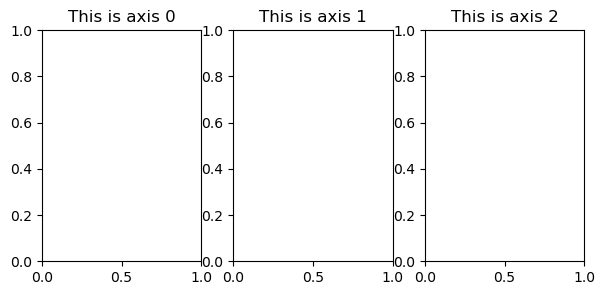

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

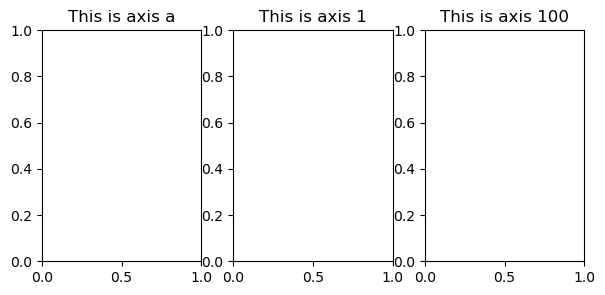

In [57]:
# Use zip to create the same subplots and avoid redundancy

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for ax, i in zip(axes, ['a', 1, 100]):
    ax.set_title(f'This is axis {i}')

plt.show()

## Exercise

1. Select the power plants in California in a variable named ca_power_plants.

2. Create a list named top_sources with California’s top 3 electric primary sources.

3. Isolate the California state boundary in a variable named ca_boundary.

In [ ]:
# 1. Select power plants in CA
ca_power_plants = power_plants[power_plants.state == "California"]
ca_power_plants.head(2)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)


In [ ]:
# 2. List of California's top 3 electric primary sources
top_sources = ca_power_plants.primsource.value_counts().index.values[0:3].tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

In [ ]:
# 3. Select CA boundary
ca_boundary = states[states.statefp == 6].geometry
ca_boundary

AttributeError: 'Figure' object has no attribute 'set_title'

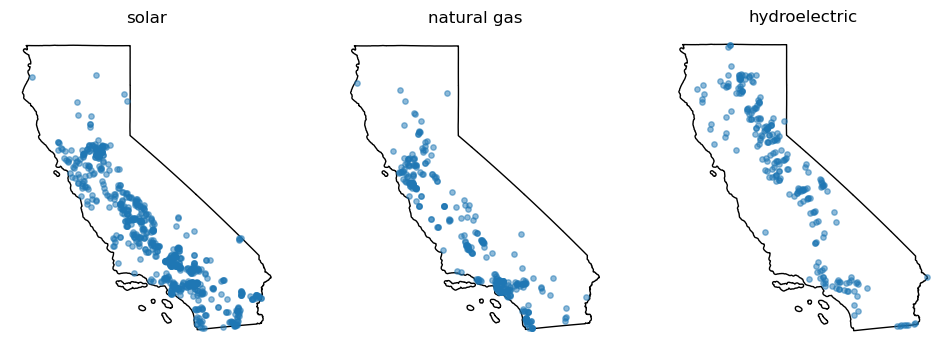

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for ax, i in zip(axes, top_sources):
    ax.set_title(i)

    ax.axis('off')

    ca_boundary.plot(ax=ax, color = 'none')

    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax=ax,
                                                             alpha = 0.5,
                                                             markersize = 15)

# ax.set_title('Top 3 energy sources for electric power plants in CA')
# don't know how to make title for overall plot

plt.show()